# Simple Linear Regression – TV Marketing vs Sales

### Objective
This notebook applies **Simple Linear Regression** to analyze and quantify the relationship between:
- **TV Marketing Spend (Independent Variable)**
- **Sales (Dependent Variable)**

The goal is to determine whether increasing TV advertising investment leads to measurable improvement in sales and to build a predictive model.


## 1️⃣ Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

plt.style.use('seaborn-v0_8')

## 2️⃣ Load Dataset
- Dataset must contain columns `TV` and `Sales`
- You may replace the dataset path depending on your repository structure

In [2]:
os.getcwd()
df = pd.read_csv("tvmarketing.csv")
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


## 3️⃣ Exploratory Data Analysis

In [3]:
df.shape, df.describe()

((200, 2),
                TV       Sales
 count  200.000000  200.000000
 mean   147.042500   14.022500
 std     85.854236    5.217457
 min      0.700000    1.600000
 25%     74.375000   10.375000
 50%    149.750000   12.900000
 75%    218.825000   17.400000
 max    296.400000   27.000000)

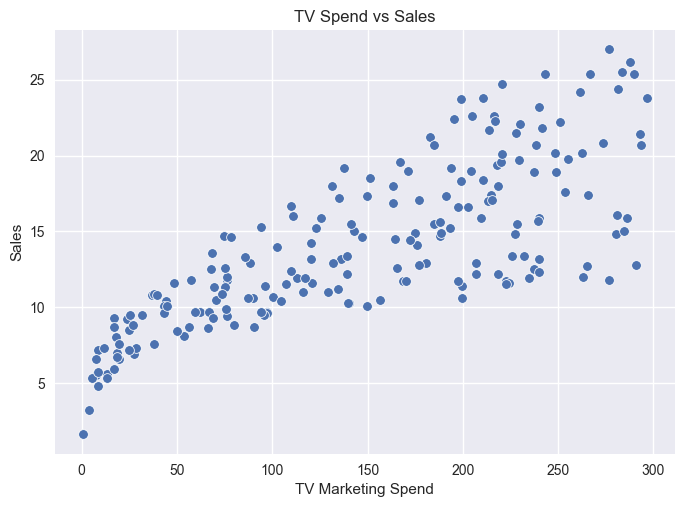

In [4]:
sns.scatterplot(x=df['TV'], y=df['Sales'])
plt.title("TV Spend vs Sales")
plt.xlabel("TV Marketing Spend")
plt.ylabel("Sales")
plt.show()

## 4️⃣ Prepare Data for Model

In [5]:
X = df[['TV']]  # Feature
y = df['Sales']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5️⃣ Train the Model

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

intercept = model.intercept_
slope = model.coef_[0]

print("Intercept:", intercept)
print("Slope:", slope)

Intercept: 7.119638430592953
Slope: 0.046529733705443346


### 📌 Model Equation
Sales = b0 + b1 × TV

- **b0 (Intercept):** Baseline Sales when TV spend = 0
- **b1 (Slope):** Expected Sales change per unit increase in TV marketing spend

## 6️⃣ Predictions

In [7]:
y_pred = model.predict(X_test)
y_pred[:5]

array([14.71794394, 16.2115484 , 20.74819743,  7.66403631, 17.37013877])

## 7️⃣ Evaluation Metrics

In [8]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

MAE : 2.444420003751042
MSE : 10.204654118800956
RMSE: 3.194472431998898
R²  : 0.6766954295627076


## 8️⃣ Visualization
### Regression Line

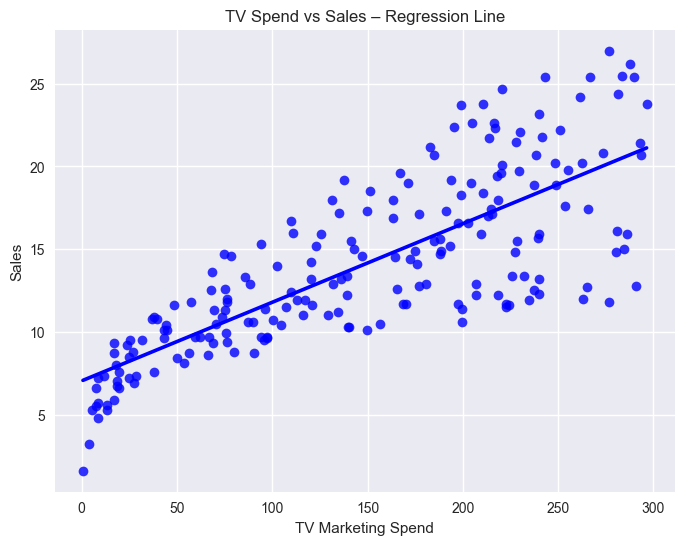

In [9]:
plt.figure(figsize=(8,6))
sns.regplot(x=df['TV'], y=df['Sales'], ci=None, color='blue')
plt.title("TV Spend vs Sales – Regression Line")
plt.xlabel("TV Marketing Spend")
plt.ylabel("Sales")
plt.show()

### Actual vs Predicted

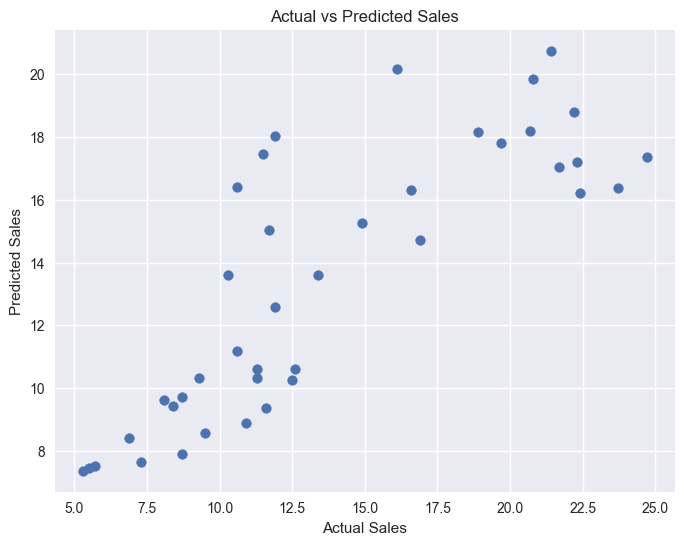

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

### Residual Plot

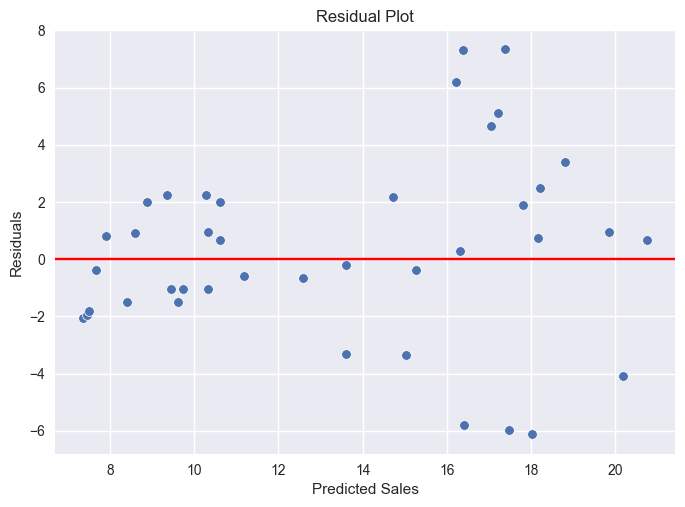

In [11]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

## 9️⃣ Business Interpretation
- The slope explains how much Sales are expected to change when TV spend increases
- A positive slope indicates advertising improves Sales
- R² indicates how well TV advertising explains Sales variation
- Residual distribution indicates model reliability

This helps leadership understand **ROI of TV marketing investment**.

## ✅ Conclusion
- Built a Simple Linear Regression model
- Learned relationship between TV spend and Sales
- Evaluated using MAE, MSE, RMSE, and R²
- Interpreted business meaning of results

**Next Steps:**
- Extend to Multiple Linear Regression using Radio & Newspaper
- Try Polynomial Regression
- Compare performance differences